
### 데이터 분류 예측 프로세스
1. 데이터 세트 분리 ex) 데이터를 학습 데이터와 테스트 데이터로 분리
2. 모델 학습 ex) 학습 데이터를 기반으로 ML 알고리즘을 적용해 모델을 학습
3. 예측 수행 ex) 학습된 ML 모델을 이용해 테스트 데이터의 분류를 예측
4. 평가 ex) 예측된 결과값과 테스트 데이터의 실제 결괏값을 비교해 ML 모델 성능을 평가




In [1]:
import sklearn
print(sklearn.__version__)

1.0.2


iris 꽃 예측을 위한 사이킷런 필요 모듈 로딩

In [3]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

데이터 셋을 로딩

In [4]:
import pandas as pd

# iris dataset을 로딩
iris = load_iris()

# iris.data는 데이터셋에서 feature만으로 된 데이터를 numpy로 가지고 있다.
iris_data = iris.data

# iris.target은 데이터셋에서 레이블(결정값) 데이터를 numpy로 가지고 있다.
iris_label = iris.target
print('iris target 값: ', iris_label)
print('iris target 명: ', iris.target_names)

# 데이터셋을 자세히 보기 위해 DataFrame으로 변환
iris


iris target 값:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
iris target 명:  ['setosa' 'versicolor' 'virginica']


### scikit-learn 특징
- 다양한 머신러닝 알고리즘을 구현한 파이썬 라이브러리
- 심플하고 일관성 있는 API, 유용한 온라인 문서, 풍부한 예제
- 머신러닝을 위한 쉽고 효율적인 개발 라이브러리 제공
- 다양한 머신러닝 관련 알고리즘과 개발을 위한 프레임워크와 API 제공
- 많은 사람들이 사용하며 다양한 환경에서 검증된 라이브러리

### scikit-learn 주요 모듈


In [3]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use(['seaborn-whitegrid'])

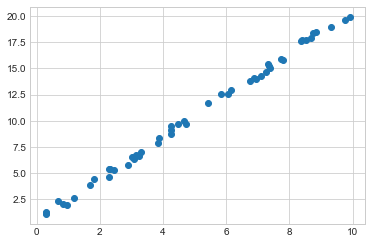

In [4]:
x = 10 * np.random.rand(50)
y = 2 * x + np.random.rand(50)
plt.scatter(x, y)

In [7]:
#  적절한 estimator 클래스를 임포트해서 모델의 클래스 선택
from sklearn.linear_model import LinearRegression

In [8]:
# 클래스를 원하는 값으로 인스턴스화해서 모델의 하이퍼파라미터 선택
model = LinearRegression(fit_intercept=True)
model

LinearRegression()

In [10]:
# 데이터를 특징 배열과 대상 벡터로 배치
X = x[:, np.newaxis]
X

array([[0.28682804],
       [3.24699189],
       [1.83036385],
       [8.69620027],
       [8.39380872],
       [7.39084262],
       [1.18478271],
       [5.42272152],
       [3.85551606],
       [4.7189794 ],
       [9.91786569],
       [0.68880464],
       [0.28189767],
       [4.65354949],
       [9.31275285],
       [7.33013015],
       [8.73876768],
       [2.32979202],
       [7.79016046],
       [0.29560669],
       [6.14992701],
       [3.87809875],
       [5.83270084],
       [7.09674944],
       [1.68225397],
       [8.36335917],
       [9.76500184],
       [2.44193001],
       [4.46216384],
       [4.26682108],
       [2.87770505],
       [6.07273163],
       [6.88254079],
       [0.82936146],
       [8.52907949],
       [3.00850683],
       [2.28348212],
       [4.26644746],
       [7.253001  ],
       [8.83589791],
       [3.29210918],
       [6.94450078],
       [3.13647125],
       [3.09288471],
       [0.94566257],
       [7.73893117],
       [2.27729458],
       [7.358

In [11]:
# 모델 인스턴스의 fit() 메서드를 호출해 모델을 데이터에 적합
model.fit(X, y)

LinearRegression()

In [12]:
model.coef_

array([1.99737793])

In [13]:
model.intercept_

0.4796425547594563

In [17]:
# 모델을 새 데이터에 대해서 적용
xfit = np.linspace(-1, 11)
Xfit = xfit[:, np.newaxis]
yfit = model.predict(Xfit)

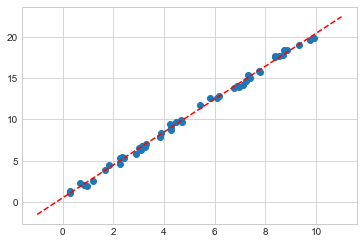

In [18]:
plt.scatter(x, y)
plt.plot(xfit, yfit, '--r')

In [19]:
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()
print(diabetes.keys())

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])


In [20]:
print(diabetes.data)

[[ 0.03807591  0.05068012  0.06169621 ... -0.00259226  0.01990842
  -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 ... -0.03949338 -0.06832974
  -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 ... -0.00259226  0.00286377
  -0.02593034]
 ...
 [ 0.04170844  0.05068012 -0.01590626 ... -0.01107952 -0.04687948
   0.01549073]
 [-0.04547248 -0.04464164  0.03906215 ...  0.02655962  0.04452837
  -0.02593034]
 [-0.04547248 -0.04464164 -0.0730303  ... -0.03949338 -0.00421986
   0.00306441]]


In [21]:
print(diabetes.target)

[151.  75. 141. 206. 135.  97. 138.  63. 110. 310. 101.  69. 179. 185.
 118. 171. 166. 144.  97. 168.  68.  49.  68. 245. 184. 202. 137.  85.
 131. 283. 129.  59. 341.  87.  65. 102. 265. 276. 252.  90. 100.  55.
  61.  92. 259.  53. 190. 142.  75. 142. 155. 225.  59. 104. 182. 128.
  52.  37. 170. 170.  61. 144.  52. 128.  71. 163. 150.  97. 160. 178.
  48. 270. 202. 111.  85.  42. 170. 200. 252. 113. 143.  51.  52. 210.
  65. 141.  55. 134.  42. 111.  98. 164.  48.  96.  90. 162. 150. 279.
  92.  83. 128. 102. 302. 198.  95.  53. 134. 144. 232.  81. 104.  59.
 246. 297. 258. 229. 275. 281. 179. 200. 200. 173. 180.  84. 121. 161.
  99. 109. 115. 268. 274. 158. 107.  83. 103. 272.  85. 280. 336. 281.
 118. 317. 235.  60. 174. 259. 178. 128.  96. 126. 288.  88. 292.  71.
 197. 186.  25.  84.  96. 195.  53. 217. 172. 131. 214.  59.  70. 220.
 268. 152.  47.  74. 295. 101. 151. 127. 237. 225.  81. 151. 107.  64.
 138. 185. 265. 101. 137. 143. 141.  79. 292. 178.  91. 116.  86. 122.
  72. 

In [22]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [25]:
print(diabetes.feature_names)
print(diabetes.target_filename)

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
diabetes_target.csv.gz


In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()
X_train, X_test, y_train, y_test = train_test_split(diabetes.data, diabetes.target, test_size=0.3)

model = LinearRegression()
model.fit(X_train, y_train)

print("학습 데이터 점수: {}".format(model.score(X_train, y_train)))
print("평가 데이터 점수: {}".format(model.score(X_test, y_test)))


학습 데이터 점수: 0.506026397217644
평가 데이터 점수: 0.5340840158386574


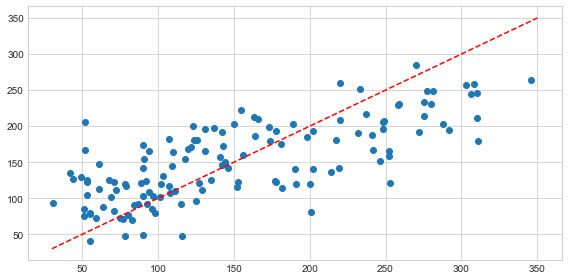

In [31]:
import matplotlib.pyplot as plt

predicted = model.predict(X_test)
expected = y_test
plt.figure(figsize=(8, 4))
plt.scatter(expected, predicted)
plt.plot([30, 350], [30, 350], '--r')
plt.tight_layout() 

In [ ]:
from sklearn.model_selection import cross_val_score, cross_validate

scores = cross_val_score(model, diabetes.data, diabetes.target, cv=5)

print("교차 검증 정확동: {}".format(scores))
print("교차 검증 정확동: {}".format(scores))

In [1]:
from sklearn.metrics import confusion_matrix

confmat = confusion_matrix(y_true=y_test, y_pred=predict)
print(confmat)

NameError: name 'y_test' is not defined